# Importing important libraries needed

In [115]:
import pandas as pd
import matplotlib as plt
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from itertools import product
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Importing data from provided CSV

In [116]:
df = pd.read_csv("C:/Users/rhyth/Downloads/Iris.csv")
print("Import Done")

Import Done


# EDA

In [117]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [120]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [121]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

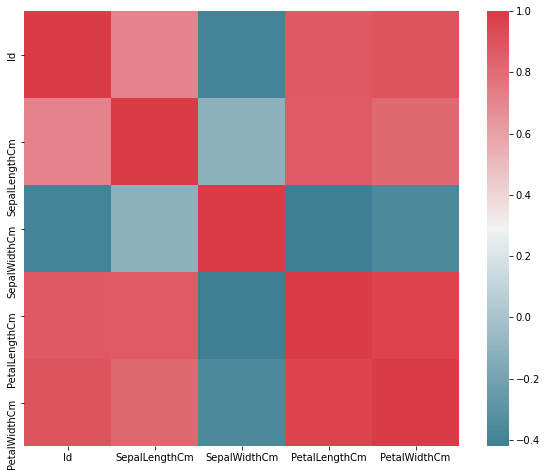

In [122]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


In [123]:
num_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
            num_cols.append(col)
        except ValueError:
            pass
count = 0
t = []
for i in num_cols:
    z = np.abs(stats.zscore(df[i]))
    for j in range(len(z)):
        if z[j]>3 or z[j]<-3:
            t.append(j)
            count+=1
df = df.drop(list(set(t)))
df = df.reset_index()
df = df.drop('index', axis=1)
print("Total number of outliers",count)


Total number of outliers 0


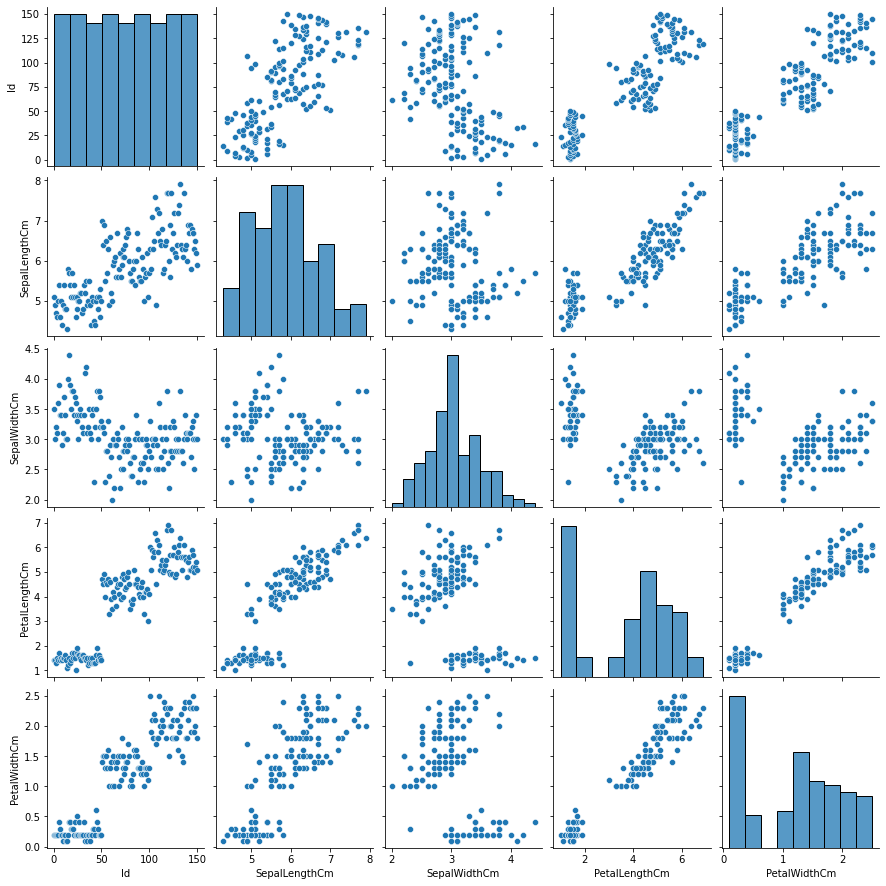

In [124]:
sns.pairplot(data=df)

Surprisingly the data was preprcessed and already clean 

# Making necessay changes in Data for creation of decision tree

C:\Users\rhyth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

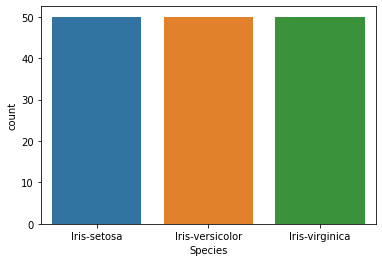

In [125]:
sns.countplot(df['Species'])

In [126]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Lable Encoding

In [127]:
#label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Species)

df['target'] = label_encoder.transform(df.Species)
X = df.iloc[:, [1, 2, 3, 4]].values
y = df.target

In [128]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


# Creating decision tree

# Splitting data into testing and training set

Here I have splitted 0.1 percent od total data set for testing and created a decision tree with maximum depth of 4

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [130]:
dt = DecisionTreeClassifier(max_depth= 4, random_state=1)

# Fit the Decision Tree

In [131]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

# Visualize the Decision Tree 

Textual format

In [132]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Graph format

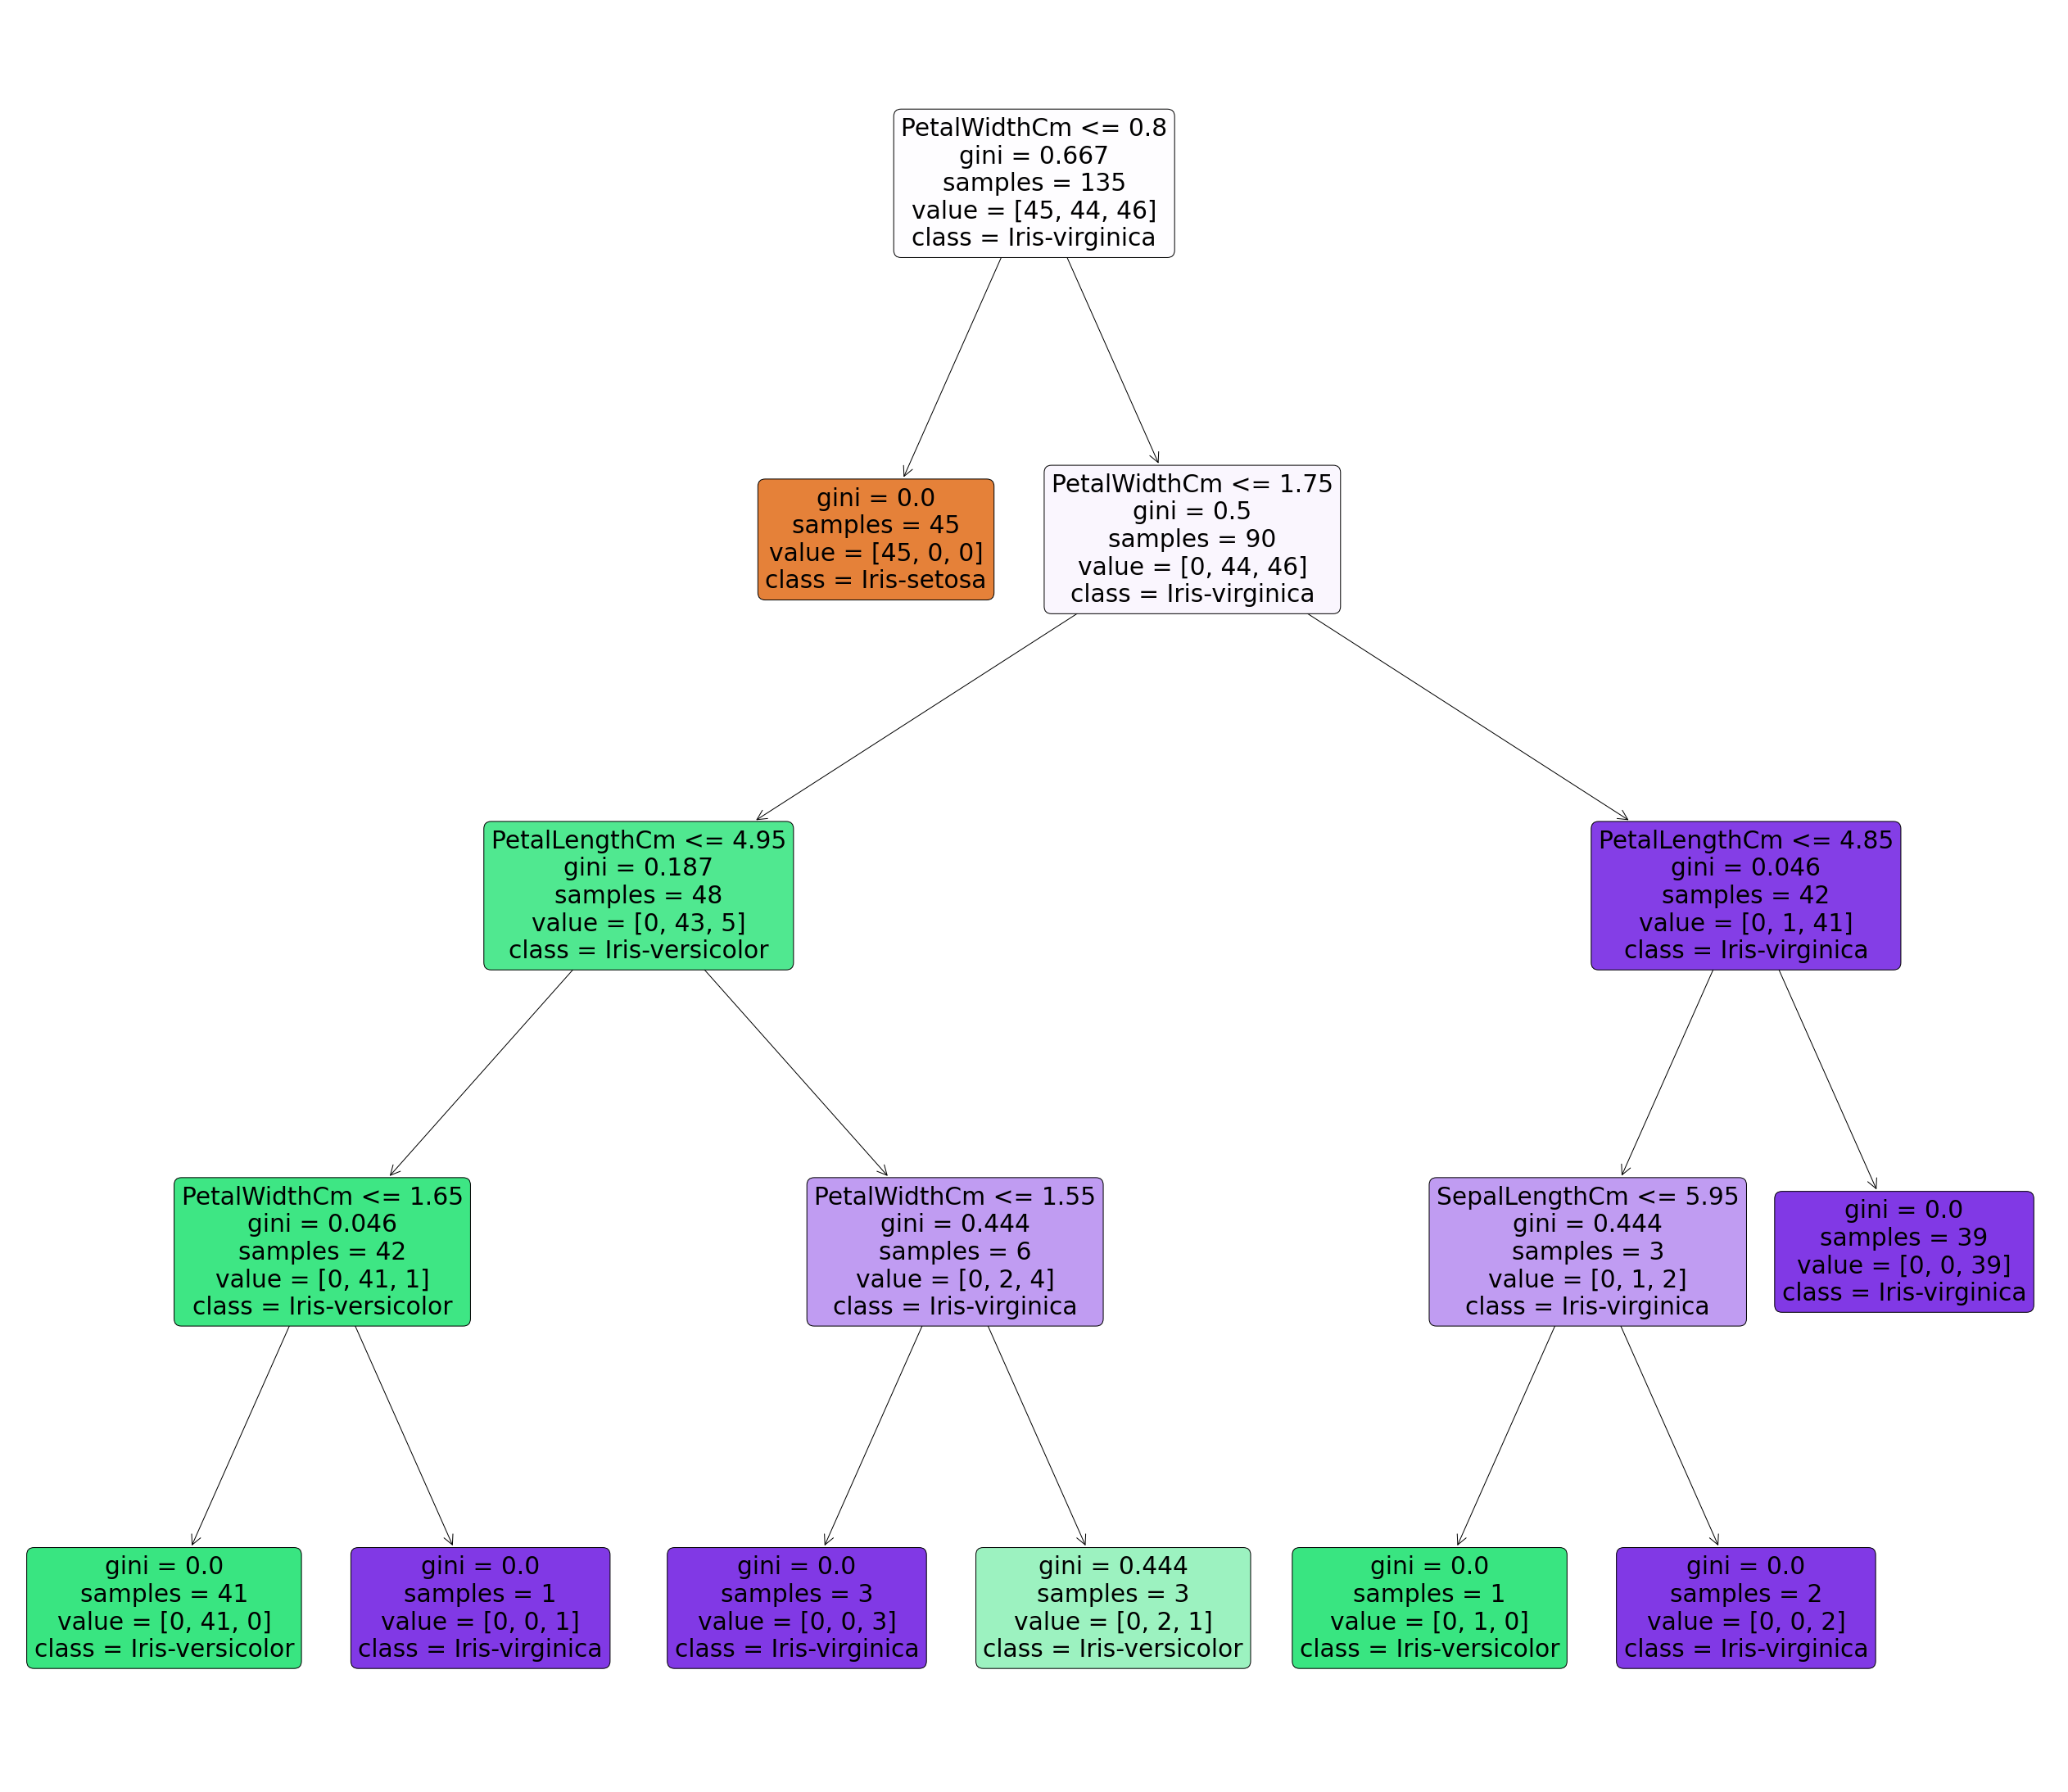

In [133]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(45,40))
plot_tree(dt, 
          feature_names = df.columns[1:5], 
          class_names = list(label_encoder.classes_), 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

# Perform Prediction

In [134]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [135]:
df.columns[6]


'target'

In [136]:
pred_test = dt.predict(X_test)

In [137]:
pd.DataFrame([pred_test, y_test]).T.head(10)

,0,1
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


# Measuring accuracy of decision tree

In [138]:
acc = accuracy_score(pred_test, y_test)

In [139]:
acc

1.0

In [140]:
df['Predicted_class'] = [list(df['Species'].unique())[int(i)] for i in dt.predict(X)]

In [141]:
acc1 = accuracy_score(df['Species'], df['Predicted_class'])

In [142]:
acc1

0.9933333333333333

# Using PCA to plot the decision boundries

In [143]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train2, y_train)


DecisionTreeClassifier(max_depth=8)

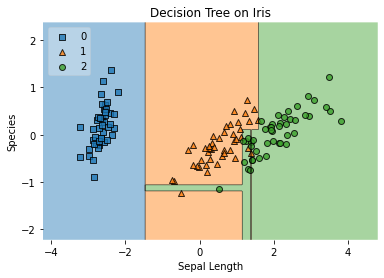

In [144]:
plot_decision_regions(X_train2, np.array(y_train), clf=dt1, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.title('Decision Tree on Iris')
plt.show()


C:\Users\rhyth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Predicted_class', ylabel='count'>

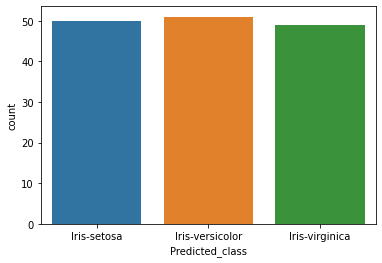

In [145]:
sns.countplot(df['Predicted_class'])

# Thank You!